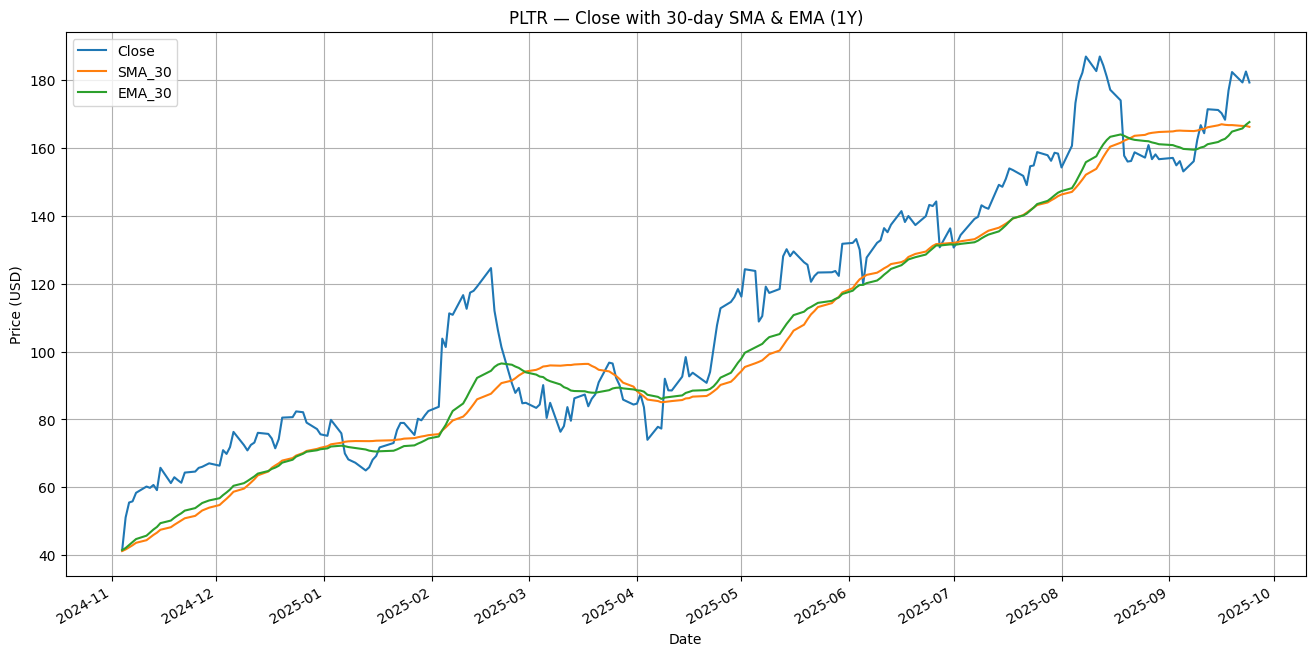

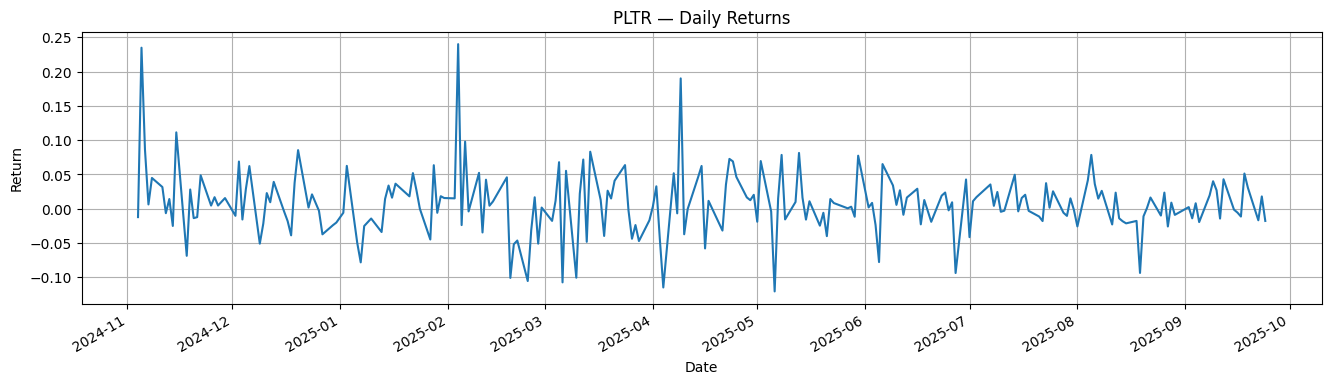

In [138]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# 1) Pull 1 year of PLTR and keep a copy-safe DataFrame with Close only
data = yf.Ticker("PLTR")
pltr_data = data.history(period="1y")[["Close"]].copy()

# 2) Indicators: 30-day SMA & EMA
pltr_data["SMA_30"] = pltr_data["Close"].rolling(30).mean()
pltr_data["EMA_30"] = pltr_data["Close"].ewm(span=30, adjust=False).mean()

# 3) Returns (two common choices). Pick ONE and keep it:
pltr_data["Ret_simple"] = pltr_data["Close"].pct_change()         # simple % change
# pltr_data["Ret_log"]   = np.log(pltr_data["Close"]).diff()      # log returns (optional)

# 4) Drop the initial NaNs created by rolling/returns
pltr_data.dropna(inplace=True)

# 5) Plot price + indicators with a proper legend
ax = pltr_data[["Close", "SMA_30", "EMA_30"]].plot(figsize=(16, 8))
ax.set_title("PLTR — Close with 30-day SMA & EMA (1Y)")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.legend(["Close", "SMA_30", "EMA_30"])  # <- explicit legend labels
ax.grid(True)
plt.show()


# (Optional) plot returns separately
ax2 = pltr_data["Ret_simple"].plot(figsize=(16, 4))
ax2.set_title("PLTR — Daily Returns")
ax2.set_ylabel("Return")
ax2.grid(True)
plt.show()